In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
data = data.drop(['TIT','CDP'], axis=1)

In [4]:
data.shape

(15039, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TAT     15039 non-null  float64
 6   TEY     15039 non-null  float64
 7   CO      15039 non-null  float64
 8   NOX     15039 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [6]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TAT,TEY,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,545.396183,134.188464,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,7.866803,15.829717,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,512.450000,100.170000,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,542.170000,127.985000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,549.890000,133.780000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,550.060000,140.895000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,550.610000,174.610000,44.103000,119.890000


In [7]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TAT     0
TEY     0
CO      0
NOX     0
dtype: int64

In [8]:
data[data.duplicated()].shape

(0, 9)

In [9]:
array = data.values

In [10]:
x = array[:,0:8]
y = array[:,8]

In [11]:
model = Sequential()
model.add(Dense(30,input_dim=8,activation = 'relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['mean_squared_error'])

In [13]:
history = model.fit(x,y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 5s 4ms/step - loss: -24169128.0000 - mean_squared_error: 4812.4468 - val_loss: -87661808.0000 - val_mean_squared_error: 4242.1772
Epoch 2/250
1008/1008 [==============================] - 4s 4ms/step - loss: -313452768.0000 - mean_squared_error: 4812.4395 - val_loss: -586608256.0000 - val_mean_squared_error: 4242.1772
Epoch 3/250
1008/1008 [==============================] - 3s 3ms/step - loss: -1152256000.0000 - mean_squared_error: 4812.4375 - val_loss: -1674422656.0000 - val_mean_squared_error: 4242.1772
Epoch 4/250
1008/1008 [==============================] - 4s 4ms/step - loss: -2671278848.0000 - mean_squared_error: 4812.4414 - val_loss: -3439197952.0000 - val_mean_squared_error: 4242.1772
Epoch 5/250
1008/1008 [==============================] - 4s 4ms/step - loss: -4957372416.0000 - mean_squared_error: 4812.4385 - val_loss: -5957275648.0000 - val_mean_squared_error: 4242.1772
Epoch 6/250
1008/1008 [============================

1008/1008 [==============================] - 4s 4ms/step - loss: -1450190176256.0000 - mean_squared_error: 4812.4414 - val_loss: -1398222094336.0000 - val_mean_squared_error: 4242.1772
Epoch 44/250
1008/1008 [==============================] - 4s 4ms/step - loss: -1544416395264.0000 - mean_squared_error: 4812.4390 - val_loss: -1488018341888.0000 - val_mean_squared_error: 4242.1772
Epoch 45/250
1008/1008 [==============================] - 4s 4ms/step - loss: -1642554982400.0000 - mean_squared_error: 4812.4434 - val_loss: -1581596147712.0000 - val_mean_squared_error: 4242.1772
Epoch 46/250
1008/1008 [==============================] - 4s 4ms/step - loss: -1744774758400.0000 - mean_squared_error: 4812.4399 - val_loss: -1678988410880.0000 - val_mean_squared_error: 4242.1772
Epoch 47/250
1008/1008 [==============================] - 4s 4ms/step - loss: -1850982531072.0000 - mean_squared_error: 4812.4404 - val_loss: -1780082409472.0000 - val_mean_squared_error: 4242.1772
Epoch 48/250
1008/1008 

1008/1008 [==============================] - 4s 4ms/step - loss: -9332880048128.0000 - mean_squared_error: 4812.4395 - val_loss: -8865583202304.0000 - val_mean_squared_error: 4242.1772
Epoch 85/250
1008/1008 [==============================] - 4s 4ms/step - loss: -9649741889536.0000 - mean_squared_error: 4812.4390 - val_loss: -9164849938432.0000 - val_mean_squared_error: 4242.1772
Epoch 86/250
1008/1008 [==============================] - 4s 3ms/step - loss: -9973554741248.0000 - mean_squared_error: 4812.4365 - val_loss: -9470610505728.0000 - val_mean_squared_error: 4242.1772
Epoch 87/250
1008/1008 [==============================] - 4s 4ms/step - loss: -10304488472576.0000 - mean_squared_error: 4812.4346 - val_loss: -9783132291072.0000 - val_mean_squared_error: 4242.1772
Epoch 88/250
1008/1008 [==============================] - 4s 4ms/step - loss: -10642667864064.0000 - mean_squared_error: 4812.4404 - val_loss: -10102488694784.0000 - val_mean_squared_error: 4242.1772
Epoch 89/250
1008/10

Epoch 125/250
1008/1008 [==============================] - 4s 4ms/step - loss: -28875759288320.0000 - mean_squared_error: 4812.4404 - val_loss: -27284599734272.0000 - val_mean_squared_error: 4242.1772
Epoch 126/250
1008/1008 [==============================] - 4s 4ms/step - loss: -29541558910976.0000 - mean_squared_error: 4812.4390 - val_loss: -27911289569280.0000 - val_mean_squared_error: 4242.1772
Epoch 127/250
1008/1008 [==============================] - 4s 4ms/step - loss: -30217429057536.0000 - mean_squared_error: 4812.4414 - val_loss: -28547429171200.0000 - val_mean_squared_error: 4242.1772
Epoch 128/250
1008/1008 [==============================] - 4s 4ms/step - loss: -30903604609024.0000 - mean_squared_error: 4812.4419 - val_loss: -29193135980544.0000 - val_mean_squared_error: 4242.1772
Epoch 129/250
1008/1008 [==============================] - 4s 4ms/step - loss: -31599989096448.0000 - mean_squared_error: 4812.4395 - val_loss: -29848588255232.0000 - val_mean_squared_error: 4242.

Epoch 166/250
1008/1008 [==============================] - 4s 4ms/step - loss: -65237965340672.0000 - mean_squared_error: 4812.4365 - val_loss: -61474357641216.0000 - val_mean_squared_error: 4242.1772
Epoch 167/250
1008/1008 [==============================] - 3s 3ms/step - loss: -66378644062208.0000 - mean_squared_error: 4812.4385 - val_loss: -62546367217664.0000 - val_mean_squared_error: 4242.1772
Epoch 168/250
1008/1008 [==============================] - 3s 3ms/step - loss: -67532727779328.0000 - mean_squared_error: 4812.4380 - val_loss: -63630330560512.0000 - val_mean_squared_error: 4242.1772
Epoch 169/250
1008/1008 [==============================] - 3s 3ms/step - loss: -68699444740096.0000 - mean_squared_error: 4812.4399 - val_loss: -64726423830528.0000 - val_mean_squared_error: 4242.1772
Epoch 170/250
1008/1008 [==============================] - 3s 3ms/step - loss: -69879566696448.0000 - mean_squared_error: 4812.4355 - val_loss: -65835058069504.0000 - val_mean_squared_error: 4242.

Epoch 207/250
1008/1008 [==============================] - 4s 4ms/step - loss: -123563474419712.0000 - mean_squared_error: 4812.4404 - val_loss: -116239405940736.0000 - val_mean_squared_error: 4242.1772
Epoch 208/250
1008/1008 [==============================] - 4s 4ms/step - loss: -125303473045504.0000 - mean_squared_error: 4812.4414 - val_loss: -117872718249984.0000 - val_mean_squared_error: 4242.1772
Epoch 209/250
1008/1008 [==============================] - 4s 4ms/step - loss: -127059300974592.0000 - mean_squared_error: 4812.4380 - val_loss: -119520425410560.0000 - val_mean_squared_error: 4242.1772
Epoch 210/250
1008/1008 [==============================] - 4s 4ms/step - loss: -128830832377856.0000 - mean_squared_error: 4812.4399 - val_loss: -121182997184512.0000 - val_mean_squared_error: 4242.1772
Epoch 211/250
1008/1008 [==============================] - 4s 4ms/step - loss: -130619442987008.0000 - mean_squared_error: 4812.4375 - val_loss: -122861742194688.0000 - val_mean_squared_er

1008/1008 [==============================] - 4s 4ms/step - loss: -206515046711296.0000 - mean_squared_error: 4812.4395 - val_loss: -194058920132608.0000 - val_mean_squared_error: 4242.1772
Epoch 248/250
1008/1008 [==============================] - 4s 4ms/step - loss: -208959839404032.0000 - mean_squared_error: 4812.4365 - val_loss: -196352835321856.0000 - val_mean_squared_error: 4242.1772
Epoch 249/250
1008/1008 [==============================] - 4s 4ms/step - loss: -211425419067392.0000 - mean_squared_error: 4812.4424 - val_loss: -198664500805632.0000 - val_mean_squared_error: 4242.1772
Epoch 250/250
1008/1008 [==============================] - 4s 4ms/step - loss: -213909873098752.0000 - mean_squared_error: 4812.4399 - val_loss: -200995527196672.0000 - val_mean_squared_error: 4242.1772


In [14]:
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]/100))

470/470 [==============================] - 1s 2ms/step - loss: -210486113075200.0000 - mean_squared_error: 4624.2456
mean_squared_error: 46.24%


In [15]:
model.metrics_names

['loss', 'mean_squared_error']

In [16]:
model.history.history.keys()

dict_keys([])

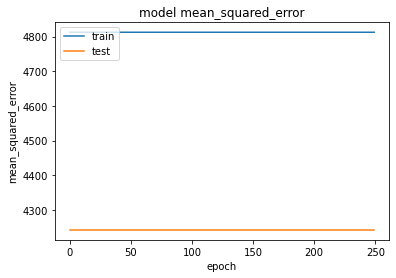

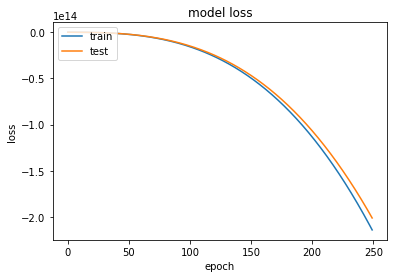

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()